In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle, os, glob

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial import distance_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import time
import seaborn as sns


from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [2]:
df_stratified = pickle.load(open("../Data/stratified_data.p", 'rb'))

In [3]:
df_stratified['articleType'] = df_stratified['articleType'].astype('category')
df_stratified['label'] = df_stratified['articleType'].cat.codes
df_stratified.head()
df_stratified = df_stratified.loc[:, ['id', 'label','articleType']]

In [4]:
df_stratified.head()

,id,label,articleType
0,55627,0,Casual Shoes
1,23930,0,Casual Shoes
2,22114,0,Casual Shoes
3,8996,0,Casual Shoes
4,24666,0,Casual Shoes


In [5]:
img_data = []
for i in df_stratified['id']:
    filepath = 'C:/fashion-dataset/fashion-dataset/images/'+str(i)+'.jpg'  
    temp = load_img(filepath, target_size = (120, 120, 3))
    temp = img_to_array(temp).flatten()
    temp /= 255
    img_data.append(temp)

In [6]:
img_data

[array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., ..., 1.,

In [6]:
img_data = np.array(img_data, dtype = float)

In [7]:
# 88 images with dimension (n_images * (240*180*3)) 
img_data.shape

(5000, 43200)

### Employing PCA for ~ 150 Components

In [ ]:
pca_explained_variance_ratio = []
for i in range(1, df_stratified.shape[0] - 1, 100):
    pca = PCA(
        n_components = i,
        svd_solver = 'auto'
    ).fit(img_data)
   
    pca_explained_variance_ratio.append(sum(pca.explained_variance_ratio_))

In [8]:
pca = PCA( 
        n_components = 150,
        svd_solver = 'auto')
pca.fit(img_data)
pca_results = pca.transform(img_data)

### KMeans After PCA [ Only 150 Components]

In [101]:
cluster = []
# for i in range(1,6):
kmeans = KMeans(n_clusters = 5)
kmeans.fit(img_data)
cluster.append(kmeans.predict(img_data))

### TSNE on complete Dataset

In [ ]:
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=500)
tsne_results_img = tsne.fit_transform(img_data)

In [ ]:
tsne_1 = tsne_results_img[:, 0]
tsne_2 = tsne_results_img[:, 1]
plt.title("TSNE PLot for Image Data with 2 components")
plt.scatter(tsne_1, tsne_2)

### TSNE on PCA Components

In [10]:
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=500)
tsne_results_pca = tsne.fit_transform(pca_results)

In [32]:
df_stratified['tsne-2d-one'] = tsne_results_pca[:,0]
df_stratified['tsne-2d-two'] = tsne_results_pca[:,1]

tsne_1 = tsne_results_pca[:, 0]
tsne_2 = tsne_results_pca[:, 1]
# plt.title("TSNE PLot on PCA Components ")
# plt.scatter(tsne_1, tsne_2)


tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_results)

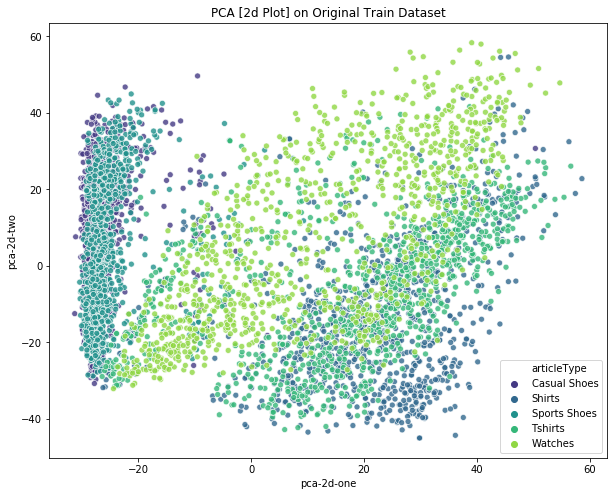

In [144]:
df_stratified['pca-2d-one'] = pca_results[:,0]
df_stratified['pca-2d-two'] = pca_results[:,1]
plt.figure(figsize=(10,8))
sns.scatterplot(x="pca-2d-one", y="pca-2d-two",
                hue="articleType",
                data=df_stratified,
                legend="full",
                palette='viridis',
                alpha=0.8).set_title("PCA [2d Plot] on Original Train Dataset")
plt.savefig("PCAOriginal", dpi = 480)

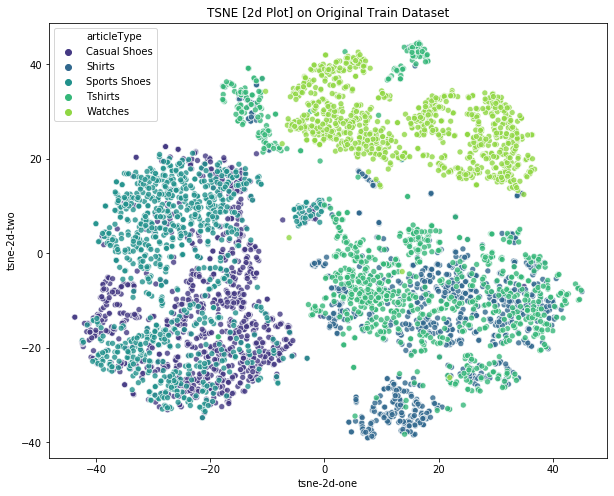

In [122]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two",
                hue="articleType",
                data=df_stratified,
                legend="full",
                palette='viridis',
                alpha=0.8).set_title("TSNE [2d Plot] on Original Train Dataset")
plt.savefig("OriginalTSNE", dpi = 480)

In [102]:
cluster_li = []
for each in range(0,len(cluster)):
    for i in cluster[each]:
        cluster_li.append(i)

In [103]:
df_result_tsne = pd.DataFrame(columns = ['tsne_2d_one', 'tsne_2d_two', 'cluster'])

for i, j, k in zip(tsne_1, tsne_2, cluster_li):
    df_result_tsne = df_result_tsne.append({'tsne_2d_one' : i, 'tsne_2d_two' : j, 'cluster' : int(k)}, ignore_index=True)

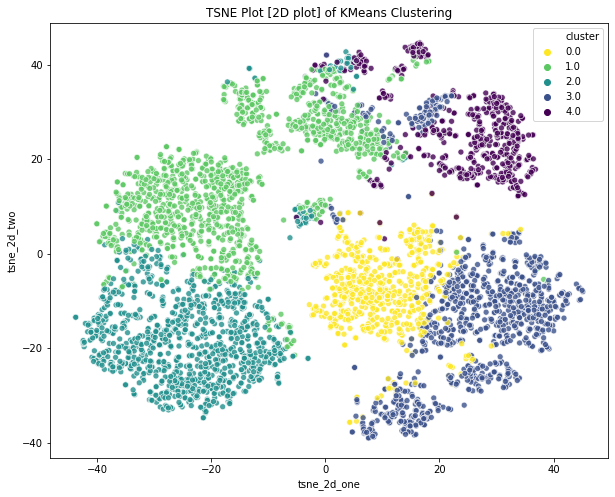

In [104]:
plt.figure(figsize=(10,8))
sns.set_palette("muted")
sns.scatterplot(x="tsne_2d_one", y="tsne_2d_two",
                hue="cluster",
                data=df_result_tsne,
                legend="full",
                alpha=0.8,
                palette='viridis_r'
               ).set_title("TSNE Plot [2D plot] of KMeans Clustering")
plt.savefig("tsneKMeans", dpi = 480)

### PCA

In [107]:
cluster = []
# for i in range(1,6):
kmeans = KMeans(n_clusters = 5)
kmeans.fit(pca_results)
cluster.append(kmeans.predict(pca_results))

In [108]:
cluster_li = []
for each in range(0,len(cluster)):
    for i in cluster[each]:
        cluster_li.append(i)
pca_1 = pca_results[:, 0]
pca_2 = pca_results[:, 1]
# label = np.array(df_stratified.label)
df_result_pca = pd.DataFrame(columns = ['pca_2d_one', 'pca_2d_two', 'cluster'])

for i, j, k in zip(pca_1, pca_2, cluster_li):
    df_result_pca = df_result_pca.append({'pca_2d_one' : i, 'pca_2d_two' : j, 'cluster' : int(k)}, ignore_index=True)

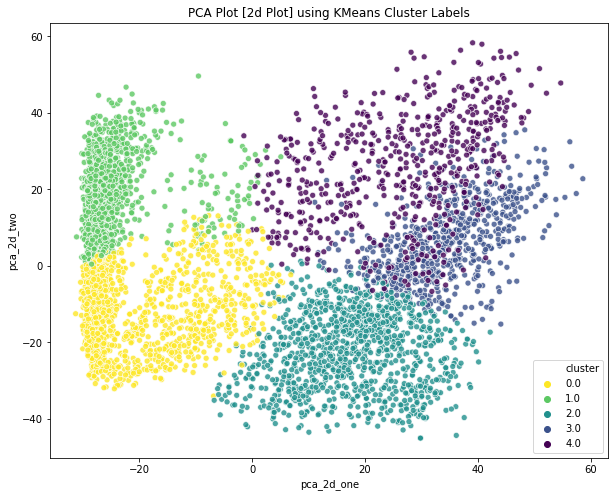

In [109]:
# ax = df_result_pca.plot.scatter(
#     x = 'pca1',
#     y = 'pca2',
#     c = 'label',
#     cmap = 'viridis',
#     alpha = 0.2
# )
# ax.set_xlabel("PCA 1")
# ax.set_ylabel("PCA 2")
# ax.set_title("PCA with original Labels")


plt.figure(figsize=(10,8))
sns.set_palette(sns.color_palette("muted", 7))
sns.scatterplot(x="pca_2d_one", y="pca_2d_two",
                hue="cluster",
                data=df_result_pca,
                legend="full",
                alpha=0.8,
                palette='viridis_r'
               ).set_title("PCA Plot [2d Plot] using KMeans Cluster Labels")
plt.savefig("pcaKmeans", dpi = 480)

### PCA and KMeans Clustering

Text(0.5, 1.0, 'KMeans Clustering -> PCA Plot')

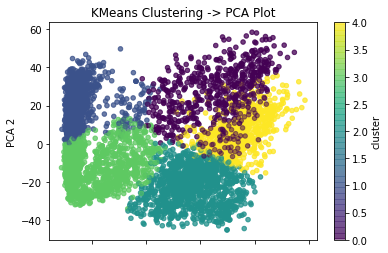

In [99]:
ax = df_result_tsne.plot.scatter(
    x = 'pca1',
    y = 'pca2',
    c = 'cluster',
    cmap = 'viridis',
    alpha = 0.5
)
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_title("KMeans Clustering -> PCA Plot")

### KMeans on PCA Components

In [94]:
cluster = []
# for i in range(1,6):
kmeans = KMeans(n_clusters = 5)
kmeans.fit(tsne_results_pca)
cluster.append(kmeans.predict(tsne_results_pca))

In [95]:
cluster_li = []
for each in range(0,len(cluster)):
    for i in cluster[each]:
        cluster_li.append(i)

In [ ]:
pca_1 = pca_results[:, 0]
pca_2 = pca_results[:, 1]
# label = np.array(df_stratified.label)
df_result_pca = pd.DataFrame(columns = ['pca_2d_one', 'pca_2d_two', 'cluster'])

for i, j, k in zip(pca_1, pca_2, cluster_li):
    df_result_pca = df_result_pca.append({'pca_2d_one' : i, 'pca_2d_two' : j, 'cluster' : int(k)}, ignore_index=True)

Text(0.5, 1.0, 'PCA Components -> KMeans Clustering')

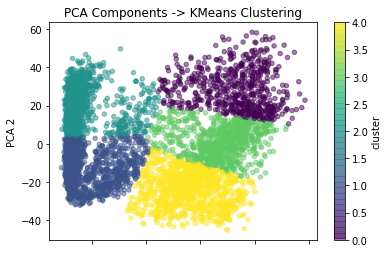

In [138]:
ax = df_result_pca.plot.scatter(
    x = 'pca1',
    y = 'pca2',
    c = 'cluster',
    cmap = 'viridis',
    alpha = 0.5
)
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_title("PCA Components -> KMeans Clustering")

### KMeans on TSNE Components

In [105]:
cluster = []
# for i in range(1,6):
kmeans = KMeans(n_clusters = 5)
kmeans.fit(tsne_results)
cluster.append(kmeans.predict(tsne_results))

cluster_li = []
for each in range(0,len(cluster)):
    for i in cluster[each]:
        cluster_li.append(i)

In [140]:
df_result_tsne = pd.DataFrame(columns = ['tsne1', 'tsne2', 'label'])

for i, j, k in zip(tsne_1, tsne_2, label):
    df_result_tsne = df_result_tsne.append({'tsne1' : i, 'tsne2' : j, 'label' : int(k)}, ignore_index=True)

Text(0.5, 1.0, 'T-SNE Plot on Original Labels')

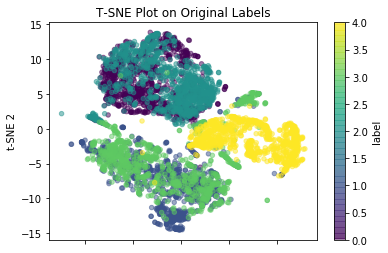

In [143]:
ax = df_result_tsne.plot.scatter(
    x = 'tsne1',
    y = 'tsne2',
    c = 'label',
    cmap = 'viridis',
    alpha = 0.5
)
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_title("T-SNE Plot on Original Labels")

In [113]:
df_result_tsne = pd.DataFrame(columns = ['tsne1', 'tsne2', 'cluster'])

for i, j, k in zip(tsne_1, tsne_2, cluster_li):
    df_result_tsne = df_result_tsne.append({'tsne1' : i, 'tsne2' : j, 'cluster' : int(k)}, ignore_index=True)

Text(0.5, 1.0, 'T-SNE Plot -> KMeans Clustering')

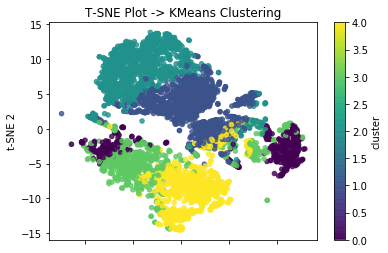

In [117]:
ax = df_result_tsne.plot.scatter(
    x = 'tsne1',
    y = 'tsne2',
    c = 'cluster',
    cmap = 'viridis',
    alpha = 0.8
)
ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_title("T-SNE Plot -> KMeans Clustering")

### GMM Clustering with PCA and T-SNE

In [145]:
cluster_gmm = []
gmm = GMM(n_components = 5)
gmm.fit(tsne_results_pca)
cluster_gmm.append(gmm.predict(tsne_results_pca))

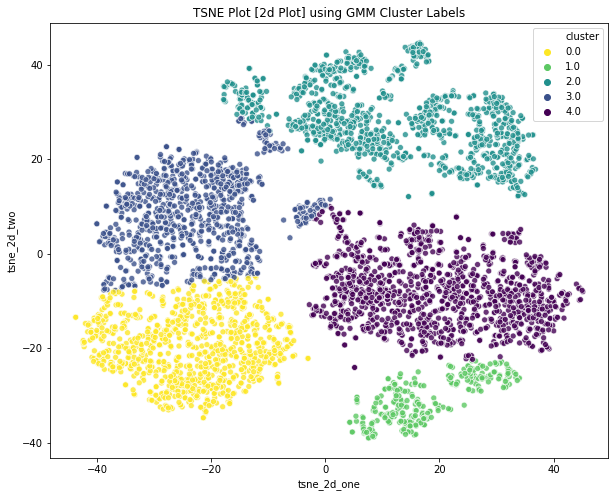

In [146]:
cluster_li_gmm = []
for each in range(0,len(cluster_gmm)):
    for i in cluster_gmm[each]:
        cluster_li_gmm.append(i)
        
df_result_tsne = pd.DataFrame(columns = ['tsne_2d_one', 'tsne_2d_two', 'cluster'])

for i, j, k in zip(tsne_1, tsne_2, cluster_li_gmm):
    df_result_tsne = df_result_tsne.append({'tsne_2d_one' : i, 'tsne_2d_two' : j, 'cluster' : int(k)}, ignore_index=True)
    
plt.figure(figsize=(10,8))
# sns.set_palette(sns.color_palette("muted", 7))
sns.scatterplot(x="tsne_2d_one", y="tsne_2d_two",
                hue="cluster",
                data=df_result_tsne,
                legend="full",
                alpha=0.8,
                palette='viridis_r'
               ).set_title("TSNE Plot [2d Plot] using GMM Cluster Labels")
plt.savefig("TSNEGMM", dpi = 480)

# ax = df_result_tsne.plot.scatter(
# x = 'tsne1',
# y = 'tsne2',
# c = 'cluster',
# cmap = 'viridis',
# alpha = 0.8
# )
# ax.set_xlabel("t-SNE 1")
# ax.set_ylabel("t-SNE 2")
# ax.set_title("T-SNE Plot -> GMM Clustering")


In [147]:
cluster_gmm = []
gmm = GMM(n_components = 5)
gmm.fit(pca_results)
cluster_gmm.append(gmm.predict(pca_results))

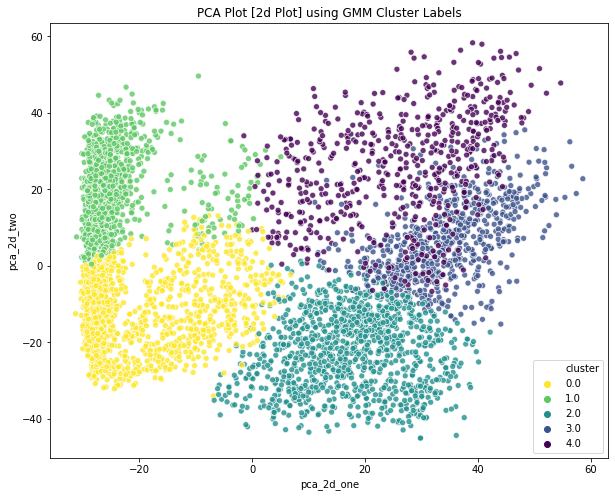

In [148]:
# label = np.array(df_stratified.label)

cluster_pca_gmm = []
for each in range(0,len(cluster_gmm)):
    for i in cluster_gmm[each]:
        cluster_pca_gmm.append(i)
        
df_result_pca = pd.DataFrame(columns = ['pca_2d_one', 'pca_2d_two', 'cluster'])

for i, j, k in zip(pca_1, pca_2, cluster_li):
    df_result_pca = df_result_pca.append({'pca_2d_one' : i, 'pca_2d_two' : j, 'cluster' : int(k)}, ignore_index=True)

plt.figure(figsize=(10,8))
sns.set_palette(sns.color_palette("muted", 7))
sns.scatterplot(x="pca_2d_one", y="pca_2d_two",
                hue="cluster",
                data=df_result_pca,
                legend="full",
                alpha=0.8,
                palette='viridis_r'
               ).set_title("PCA Plot [2d Plot] using GMM Cluster Labels")
plt.savefig("pcaGMM", dpi = 480)
    # ax = df_result_pca.plot.scatter(
#     x = 'pca1',
#     y = 'pca2',
#     c = 'cluster',
#     cmap = 'viridis',
#     alpha = 0.5
# )
# ax.set_xlabel("PCA 1")
# ax.set_ylabel("PCA 2")
# ax.set_title("PCA -> GMM Clustering")

Text(0.5, 1.0, 'PCA -> GMM Clustering')

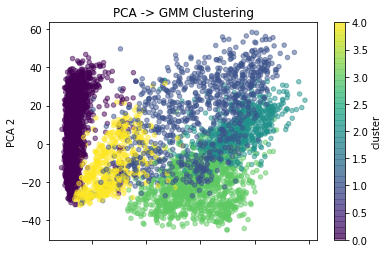

In [159]:
# TRY WITH 150 COmponent
pca_150 = PCA( 
        n_components = 150,
        svd_solver = 'auto')
pca_150.fit(img_data)
pca_results_150 = pca_150.transform(img_data)

pca_1_150 = pca_results_150[:, 0]
pca_2_150 = pca_results_150[:, 1]

cluster_gmm = []
gmm = GMM(n_components = 5)
gmm.fit(pca_results_150)
cluster_gmm.append(gmm.predict(pca_results_150))
cluster_li = []
for each in range(0,len(cluster_gmm)):
    for i in cluster_gmm[each]:
        cluster_li.append(i)
        
df_result_pca = pd.DataFrame(columns = ['pca1', 'pca2', 'cluster'])

for i, j, k in zip(pca_1_150, pca_2_150, cluster_li):
    df_result_pca = df_result_pca.append({'pca1' : i, 'pca2' : j, 'cluster' : int(k)}, ignore_index=True)

ax = df_result_pca.plot.scatter(
    x = 'pca1',
    y = 'pca2',
    c = 'cluster',
    cmap = 'viridis',
    alpha = 0.5
)
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_title("PCA -> GMM Clustering")


### Agglomerative Clustering on PCA  components

In [164]:

clustering_img = AgglomerativeClustering(
linkage='ward',
n_clusters = 5).fit(tsne_results_pca)
labels = clustering_img.labels_



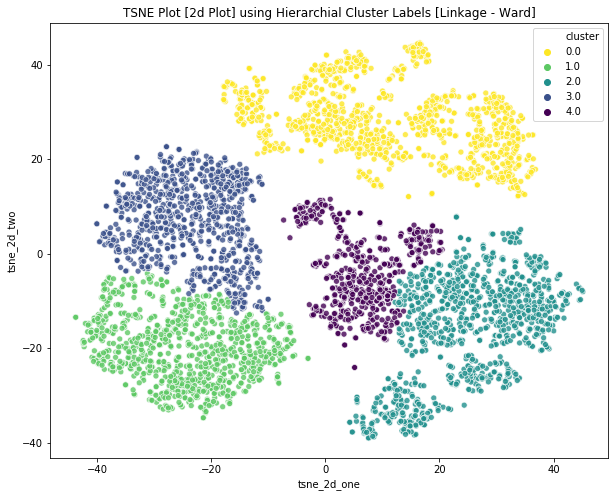

In [165]:
# df_result_pca = pd.DataFrame(columns = ['pca1', 'pca2', 'cluster'])

# for i, j, k in zip(pca_1, pca_2, labels):
#     df_result_pca = df_result_pca.append({'pca1' : i, 'pca2' : j, 'cluster' : int(k)}, ignore_index=True)

# ax = df_result_pca.plot.scatter(
#     x = 'pca1',
#     y = 'pca2',
#     c = 'cluster',
#     cmap = 'viridis',
#     alpha = 0.5
# )
# ax.set_xlabel("PCA 1")
# ax.set_ylabel("PCA 2")
# ax.set_title("PCA -> Agglomerative Clustering[Linkage-WARD]")

df_result_tsne = pd.DataFrame(columns = ['tsne_2d_one', 'tsne_2d_two', 'cluster'])

for i, j, k in zip(tsne_1, tsne_2, labels):
    df_result_tsne = df_result_tsne.append({'tsne_2d_one' : i, 'tsne_2d_two' : j, 'cluster' : int(k)}, ignore_index=True)

plt.figure(figsize=(10,8))
# sns.set_palette(sns.color_palette("muted", 7))
sns.scatterplot(x="tsne_2d_one", y="tsne_2d_two",
                hue="cluster",
                data=df_result_tsne,
                legend="full",
                alpha=0.8,
                palette='viridis_r'
               ).set_title("TSNE Plot [2d Plot] using Hierarchial Cluster Labels [Linkage - Ward]")
plt.savefig("TSNEAggWard", dpi = 480)



In [227]:
clustering_pca_average = AgglomerativeClustering(
linkage='average',
n_clusters = 5).fit(pca_results)
labels = clustering_pca_average.labels_


Text(0.5, 1.0, 'PCA -> Agglomerative Clustering[Linkage-AVERAGE]')

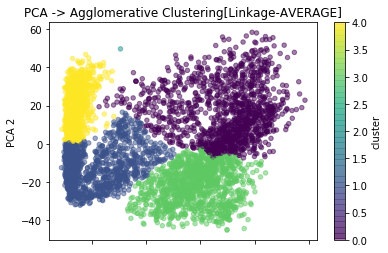

In [228]:
df_result_pca = pd.DataFrame(columns = ['pca1', 'pca2', 'cluster'])

for i, j, k in zip(pca_1, pca_2, labels):
    df_result_pca = df_result_pca.append({'pca1' : i, 'pca2' : j, 'cluster' : int(k)}, ignore_index=True)

ax = df_result_pca.plot.scatter(
    x = 'pca1',
    y = 'pca2',
    c = 'cluster',
    cmap = 'viridis',
    alpha = 0.5
)
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_title("PCA -> Agglomerative Clustering[Linkage-AVERAGE]")

In [225]:
clustering_pca_comp = AgglomerativeClustering(
linkage='complete',
n_clusters = 5).fit(pca_results)
labels = clustering_pca_comp.labels_

Text(0.5, 1.0, 'PCA -> Agglomerative Clustering[Linkage-Complete]')

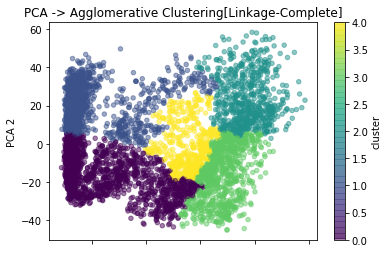

In [226]:
df_result_pca = pd.DataFrame(columns = ['pca1', 'pca2', 'cluster'])

for i, j, k in zip(pca_1, pca_2, labels):
    df_result_pca = df_result_pca.append({'pca1' : i, 'pca2' : j, 'cluster' : int(k)}, ignore_index=True)

ax = df_result_pca.plot.scatter(
    x = 'pca1',
    y = 'pca2',
    c = 'cluster',
    cmap = 'viridis',
    alpha = 0.5
)
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_title("PCA -> Agglomerative Clustering[Linkage-Complete]")

### Agglomerative Clustering on TSNE Components

In [198]:

clustering_img = AgglomerativeClustering(
linkage='ward',
n_clusters = 5).fit(tsne_results)
labels = clustering_img.labels_


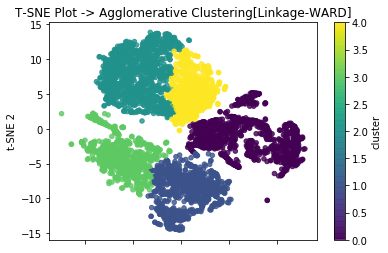

In [199]:

        
df_result_tsne = pd.DataFrame(columns = ['tsne1', 'tsne2', 'cluster'])

for i, j, k in zip(tsne_1, tsne_2, labels):
    df_result_tsne = df_result_tsne.append({'tsne1' : i, 'tsne2' : j, 'cluster' : int(k)}, ignore_index=True)

ax = df_result_tsne.plot.scatter(
x = 'tsne1',
y = 'tsne2',
c = 'cluster',
cmap = 'viridis',
alpha = 0.8)

ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_title("T-SNE Plot -> Agglomerative Clustering[Linkage-WARD]")
plt.show()

In [219]:

clustering_img_average = AgglomerativeClustering(
linkage='average',
n_clusters = 5).fit(tsne_results)
labels = clustering_img_average.labels_


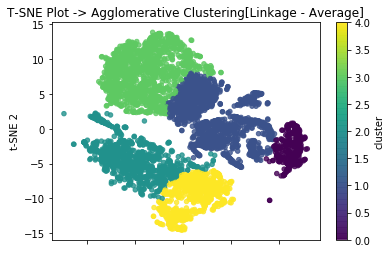

In [220]:
        
df_result_tsne = pd.DataFrame(columns = ['tsne1', 'tsne2', 'cluster'])

for i, j, k in zip(tsne_1, tsne_2, labels):
    df_result_tsne = df_result_tsne.append({'tsne1' : i, 'tsne2' : j, 'cluster' : int(k)}, ignore_index=True)

ax = df_result_tsne.plot.scatter(
x = 'tsne1',
y = 'tsne2',
c = 'cluster',
cmap = 'viridis',
alpha = 0.8)

ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_title("T-SNE Plot -> Agglomerative Clustering[Linkage - Average]")
plt.show()

In [223]:

clustering_img_complete = AgglomerativeClustering(
linkage='complete',
n_clusters = 5).fit(tsne_results)
labels = clustering_img_complete.labels_


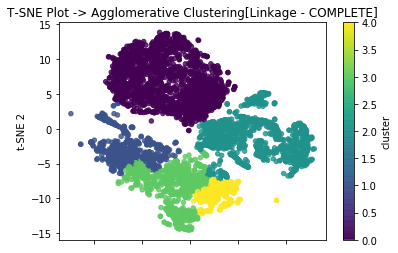

In [224]:
        
df_result_tsne = pd.DataFrame(columns = ['tsne1', 'tsne2', 'cluster'])

for i, j, k in zip(tsne_1, tsne_2, labels):
    df_result_tsne = df_result_tsne.append({'tsne1' : i, 'tsne2' : j, 'cluster' : int(k)}, ignore_index=True)

ax = df_result_tsne.plot.scatter(
x = 'tsne1',
y = 'tsne2',
c = 'cluster',
cmap = 'viridis',
alpha = 0.8)

ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_title("T-SNE Plot -> Agglomerative Clustering[Linkage - COMPLETE]")
plt.show()

### TRYING Recommendation with KMeans

In [236]:
model = KMeans(n_clusters=5).fit(img_data)

In [238]:
model.cluster_centers_

array([[0.99317593, 0.99295059, 0.99249655, ..., 0.99346181, 0.99321293,
        0.99292705],
       [0.9948367 , 0.99420717, 0.99335817, ..., 0.99329464, 0.99297698,
        0.99215686],
       [0.9979634 , 0.99790138, 0.99777043, ..., 0.99768083, 0.9974465 ,
        0.99729143],
       [0.99247387, 0.99217053, 0.99159937, ..., 0.99284553, 0.99256405,
        0.99204755],
       [0.998302  , 0.99824136, 0.99807291, ..., 0.99832895, 0.99826157,
        0.99811333]])

[0]


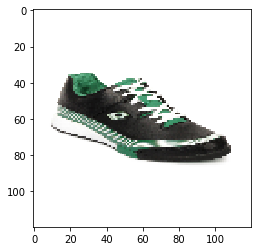

In [314]:
x = np.reshape(img_data[12], (1, len(img_data[0])))
print(model.predict(x))

y = np.reshape(x, (120,120,3))
plt.imshow(y)

[1]


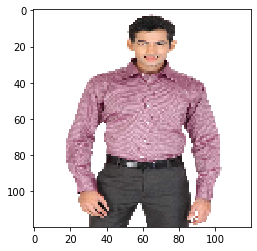

In [315]:
x = np.reshape(img_data[1400], (1, len(img_data[1])))
print(model.predict(x))
y = np.reshape(x, (120,120,3))
plt.imshow(y)

[2]


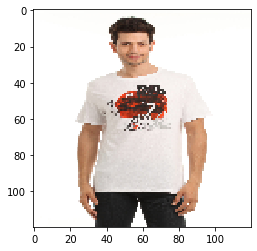

In [316]:
x = np.reshape(img_data[3100], (1, len(img_data[1])))
print(model.predict(x))
y = np.reshape(x, (120,120,3))
plt.imshow(y)

[2]


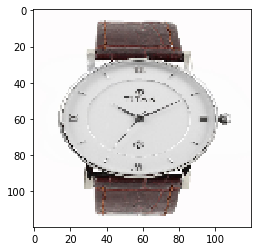

In [317]:
x = np.reshape(img_data[4999], (1, len(img_data[1])))
print(model.predict(x))
y = np.reshape(x, (120,120,3))
plt.imshow(y)

[3]


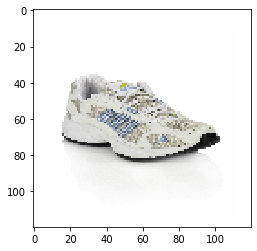

In [320]:
x = np.reshape(img_data[2000], (1, len(img_data[1])))
print(model.predict(x))
y = np.reshape(x, (120,120,3))
plt.imshow(y)

In [321]:
labels = model.predict(img_data)

In [323]:
df_stratified['pred_labels'] = labels

In [336]:
df_sport = df_stratified[4000:5000]

In [343]:
li = []
for i in df_sport['pred_labels']:
    li.append(i)

In [349]:
li.count(0), li.count(3), li.count(1), li.count(4), li.count(2)

(33, 353, 1, 492, 121)

In [351]:
df_formal = df_stratified[1000:2000]
li = []
for i in df_formal['pred_labels']:
    li.append(i)

In [352]:
li.count(0), li.count(3), li.count(1), li.count(4), li.count(2)

(2, 66, 267, 31, 634)

In [353]:
df_stratified

,id,label,pred_labels
0,55627,0,0
1,23930,0,0
2,22114,0,3
3,8996,0,0
4,24666,0,3
5,13083,0,0
6,29568,0,0
7,22702,0,3
8,20681,0,0
9,3640,0,0


In [360]:
df_formal = df_stratified[4000:4999]
li = []
for i in df_formal['pred_labels']:
    li.append(i)

In [361]:
li.count(0), li.count(3), li.count(1), li.count(4), li.count(2)

(33, 353, 1, 492, 120)

In [422]:
filepath = 'C:/fashion-dataset/fashion-dataset/images/'+str(2367)+'.jpg'  
temp = load_img(filepath, target_size = (120, 120, 3))
temp = img_to_array(temp).flatten()
temp /= 255


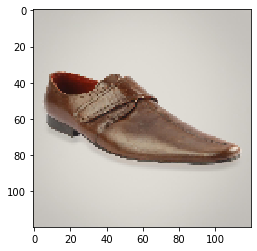

In [423]:
test_data = np.reshape(temp, (1,43200))
plt.imshow(np.reshape(test_data, (120,120,3)))

In [424]:
x = model.predict(test_data)

In [425]:
map_dict = {'0':0,
           '1': 3,
            '2':1,
            '3':2,
            '4':4
           }
def cluster_predict(i, map_dict):
    return map_dict[str(i)]
    

In [426]:
# Prediciting the right cluster image
cluster_id = cluster_predict(int(x), map_dict)

0

In [431]:
images= []
def id_retrieve(df_stratified, cluster_id):
    if df_stratified['label'] == cluster_id:
        images.append(df_stratified['id'])

In [433]:
df_stratified

,id,label,pred_labels
0,55627,0,0
1,23930,0,0
2,22114,0,3
3,8996,0,0
4,24666,0,3
5,13083,0,0
6,29568,0,0
7,22702,0,3
8,20681,0,0
9,3640,0,0


In [441]:
display_recommendation_cosine(test_data, 5)

[array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), array([1., 1., 1., ..., 1., 1., 1.], dtype=float32), array([1., 1., 1., ..., 1., 1., 1.], dtype=fl

ValueError: setting an array element with a sequence.

In [439]:
def get_recommendation_cosine(img, top_n):
    temp = img_data
    temp.append(img)
    l = len(temp)
    print(temp)
    cosine_sim = 1 - pairwise_distances(temp, metric='cosine')
    sim_scores = list(enumerate(cosine_sim[l-1]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    return idx_rec, idx_sim

In [440]:
def display_recommendation_cosine(ref_img, top_n):
    
    #Getting recommendations
    idx_rec, idx_sim = get_recommendation_cosine(ref_img, top_n)
    rec_images = []
    for r in idx_rec:
        rec_images.append(X_img_train[r])
    rec_images = np.array(rec_images)
    
    #plotting original image
    pyplot.imshow(np.uint8(ref_img*255).reshape(80, 60, 3))
    pyplot.title("Original Image")
    pyplot.show()
    
    #Plotting recommendations
    fig, ax = pyplot.subplots(1, top_n, figsize=(8, 3))
    rec = rec_images.reshape(top_n, 80, 60, 3)
    for axi, center in zip(ax.flat, rec):
        axi.set(xticks=[], yticks=[])
        axi.imshow(center, interpolation='nearest', cmap=pyplot.cm.binary)
        